# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [2]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
def evaluation(ytrain, trainpred, ytest, pred):
  print(f"Model Evaluation :\nTrain MSE :{mean_squared_error(ytrain, trainpred)}\nTrain MAE : {mean_absolute_error(ytrain, trainpred)}\nTrain R squared : {r2_score(ytrain, trainpred)}")
  print(f"------------\nTest MSE : {mean_squared_error(ytest, pred)}\nTest MAE : {mean_absolute_error(ytest, pred)}\nTest R squared : {r2_score(ytest, pred)}")

In [4]:
np.random.seed(123)
X = np.random.uniform(10, 100, 100)
# X

In [5]:
g_noise = np.random.normal(0, 2, len(X))

In [6]:
y = 2*X + 3 + g_noise

In [7]:
#since LR accepts only a 2d x
X = X.reshape(-1, 1)

In [8]:
X.shape

(100, 1)

In [9]:
y.shape

(100,)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [11]:
reg = LinearRegression()

In [12]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [13]:
reg.coef_

array([1.99770191])

In [14]:
reg.intercept_

np.float64(3.1358895625969154)

In [15]:
pred = reg.predict(xtest)

In [16]:
print(pred)

[ 93.04356612 121.11241448  40.32136563  68.14307325 178.86938006
 113.33971643 153.36502946  80.42493558  84.81397274 148.33331271
 118.68221623  39.67274797 153.17823035 111.87411832 149.85969289
 152.46851687 123.21908451  51.6927673  101.96520367 101.08941818]


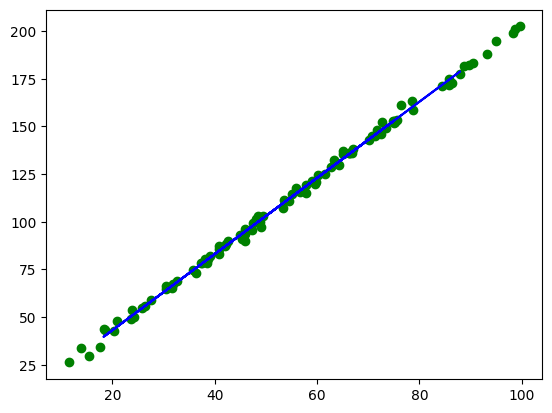

In [17]:
plt.scatter(X, y, color = 'green', label = 'Actual Data')
plt.plot(xtest, pred, color='blue', label = 'Linear regression line')

In [18]:
trainpred = reg.predict(xtrain)

In [19]:
evaluation(ytrain, trainpred, ytest, pred)

Model Evaluation :
Train MSE :3.926098585576309
Train MAE : 1.5740375774041844
Train R squared : 0.998084046096101
------------
Test MSE : 3.4904190924018756
Test MAE : 1.365851118053309
Test R squared : 0.9976746055590124


- Scine there is some added noise the mse was greatly effected because it doesnt bode well with outliers
-The better metric for this is the MAE
- The outliers in the data caused the error of the train to be higher than the test
- There is no Overfitting nor Underfitting since the model is close to 1 in both train and test

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [20]:
np.random.seed(123)
a = np.random.uniform(1, 10, 100)
b = np.random.uniform(100, 10000, 100)

In [21]:
np.random.seed(123)
noise = np.random.normal(0, 3, len(a))

In [22]:
y = 3*a + 10*b+ 9+noise

In [23]:
y.shape

(100,)

In [24]:
X = pd.DataFrame({"a" : a , "b": b})
# X

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [26]:
multreg = LinearRegression()

In [27]:
multreg.fit(xtrain, ytrain)

LinearRegression()

In [28]:
multreg.coef_  # they dindt change much

array([ 3.08421396, 10.00017673])

In [29]:
multreg.intercept_

np.float64(7.803744504148199)

In [30]:
pred = multreg.predict(xtest)
trainpred = multreg.predict(xtrain)

In [31]:
evaluation(ytrain, trainpred, ytest, pred)

Model Evaluation :
Train MSE :11.714076248646062
Train MAE : 2.8732488473418956
Train R squared : 0.9999999853695847
------------
Test MSE : 9.597444294075348
Test MAE : 2.485312768859069
Test R squared : 0.9999999865974313


-Even after playin g with the outliers it still didnt seem to have an effect on the evaluation metrics maybe becase the model is still too simple to overfit or unfderfit

# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [32]:
np.random.seed(123)
xnoise = np.random.normal(0, 5000, 1000)

In [33]:
np.random.seed(321)
ynoise = np.random.normal(0, 1000, 1000)

In [34]:
X = np.random.uniform(-3, 3, 1000) + xnoise

In [35]:
y = (7*(X**2)) -4*X + 10 + ynoise

In [36]:
X = X.reshape(-1, 1)

In [37]:
X.shape

(1000, 1)

In [38]:
y.shape

(1000,)

In [39]:
ply = PolynomialFeatures(degree =3)

In [40]:
Xpoly = ply.fit_transform(X)

In [41]:
ply.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3'], dtype=object)

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(Xpoly, y, test_size = 0.20, random_state = 42)

In [43]:
preg = LinearRegression()
preg.fit(xtrain, ytrain)

LinearRegression()

In [44]:
preg.coef_

array([ 0.00000000e+00, -4.00874456e+00,  7.00000071e+00,  1.42693857e-10])

In [45]:
pred = preg.predict(xtest)
trainpred = preg.predict(xtrain)

In [46]:
evaluation(ytrain, trainpred, ytest, pred)

Model Evaluation :
Train MSE :985175.9497281011
Train MAE : 793.4139558286238
Train R squared : 0.9999999999842858
------------
Test MSE : 1073152.0873531357
Test MAE : 824.3053188094942
Test R squared : 0.9999999999800465


## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [48]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airlines-flights-data


In [49]:
os.listdir(path)

['airlines_flights_data.csv']

In [50]:
full_path = os.path.join(path,os.listdir(path)[0])

In [51]:
import pandas as pd
df = pd.read_csv(full_path)

In [52]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


- Index col can be dropped
- Departure_time, sftops, arrival_time, class are objects need to be encoded ordinally

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [54]:
df.duplicated().sum()

np.int64(0)

In [55]:
df.drop('index', axis=1).duplicated().sum()

np.int64(0)

In [56]:
df.drop('index', axis=1, inplace=True)

In [57]:
objects = df.select_dtypes('object').columns.tolist()

In [58]:
for col in objects:
  print(f"{col} unique values :\n{df[col].unique()}\n")

airline unique values :
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']

flight unique values :
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']

source_city unique values :
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

departure_time unique values :
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']

stops unique values :
['zero' 'one' 'two_or_more']

arrival_time unique values :
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']

destination_city unique values :
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

class unique values :
['Economy' 'Business']



In [59]:
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


- The object values dont seem to have inconsitencies or error entries, no null values , no duplicates

In [60]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


- From looking at the price it seems there are outliers since the mean is 20000 and the 50% is far from it 7000
- The duration and days left look normal

In [61]:
df.describe(include='O')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


# Visulaization of Districutions

In [62]:
numeric = df.select_dtypes(['float64', 'int64']).columns.to_list()
numeric

['duration', 'days_left', 'price']

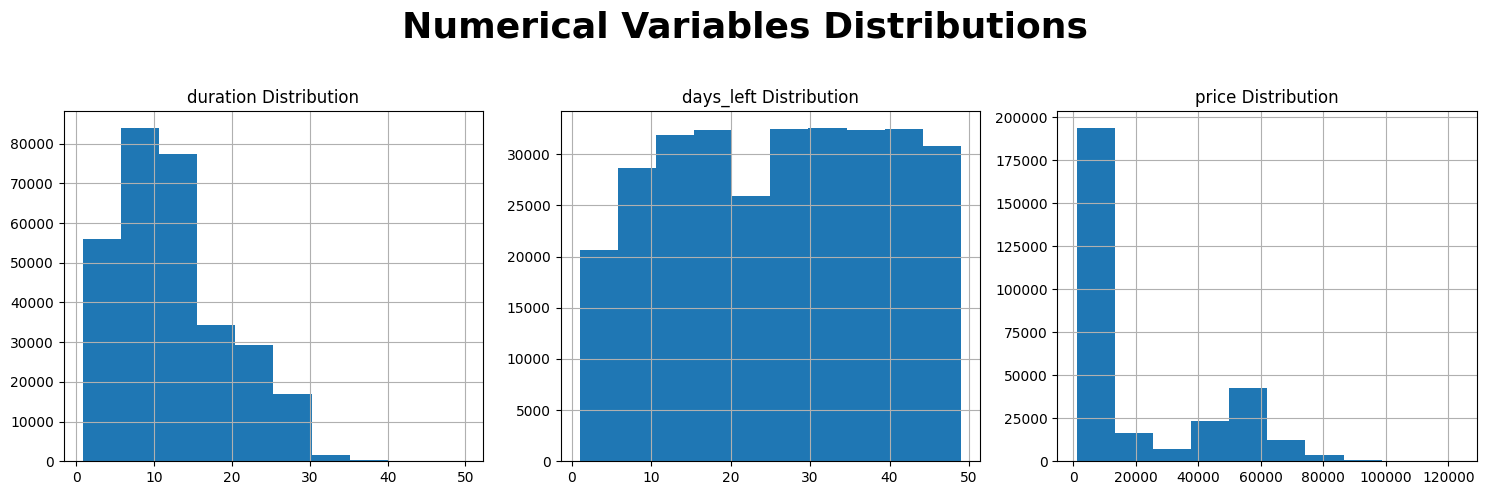

In [63]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric):
  plt.subplot(1, 3, i+1)
  df[col].hist()
  plt.title(f"{col} Distribution")
plt.suptitle("Numerical Variables Distributions", fontsize=26, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])

- its seems that as predicted price is highly right skewed which need to be dealt with as regression is sensitive to outliers
- Days doesnt seem to have an apparent distribution
- Duration is slightly right skewed close to normal
- values of duration and days left are far from price (scalling needed)
- Most people book flights from 5 to 20 days and from 30 to 40 days before their actual flight

- The Duration people flights are usually between 10 to 20 hours? why ? isnt the flights all inside india? may have a relation with stops

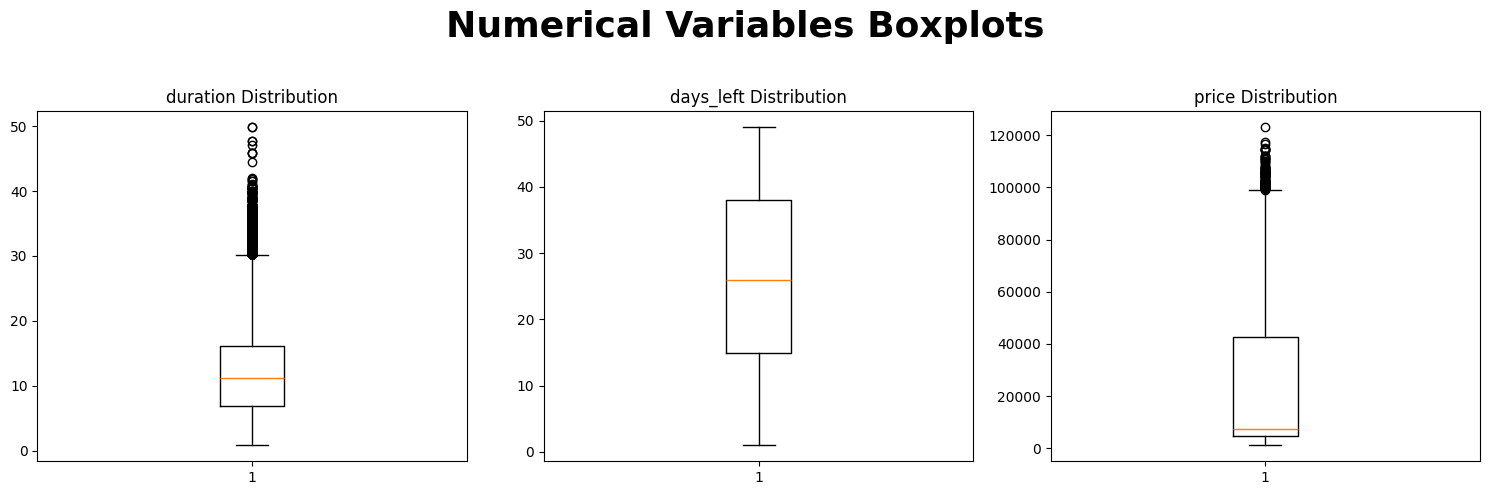

In [64]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric):
  plt.subplot(1, 3, i+1)
  plt.boxplot(df[col])
  plt.title(f"{col} Distribution")
plt.suptitle("Numerical Variables Boxplots", fontsize=26, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])

In [65]:
q1 = np.quantile(df['price'], 0.25)
q3 = np.quantile(df['price'], 0.75)
IQR = q3-q1

In [66]:
lb = q1-IQR*1.5
up = q3+IQR*1.5
outliers = df[(df['price']<lb) | (df['price']>up)]

In [67]:
q12 = np.quantile(df['duration'], 0.25)
q32 = np.quantile(df['duration'], 0.75)
IQR2 = q32-q12
lb2 = q12-IQR2*1.5
up2 = q32+IQR2*1.5
outliers2 = df[(df['duration']<lb2) | (df['duration']>up2)]

In [68]:
outliers.describe()#price

,duration,days_left,price
count,123.000000,123.000000,123.000000
mean,14.403171,8.300813,104639.130081
std,5.388195,8.815909,4717.170750
min,5.920000,1.000000,99129.000000
25%,10.710000,3.000000,101453.500000
50%,13.330000,5.000000,102648.000000
75%,17.125000,10.000000,106753.000000
max,28.170000,45.000000,123071.000000


In [69]:
outliers2.describe() #duration

,duration,days_left,price
count,2110.000000,2110.000000,2110.000000
mean,33.177270,22.148815,16956.301896
std,2.635267,14.155696,16854.197441
min,30.250000,1.000000,4363.000000
25%,31.170000,10.000000,7490.000000
50%,32.500000,20.000000,11865.000000
75%,34.330000,34.000000,15372.500000
max,49.830000,49.000000,96617.000000


- there are alot of outliers in duration 2110 entries
- Outliers in price are 123 entries

{'whiskers': [<matplotlib.lines.Line2D at 0x7d1843da9710>,
 'caps': [<matplotlib.lines.Line2D at 0x7d1843da9e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d1843da8ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d1843d1fb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d1843d1d0d0>],
 'means': []}

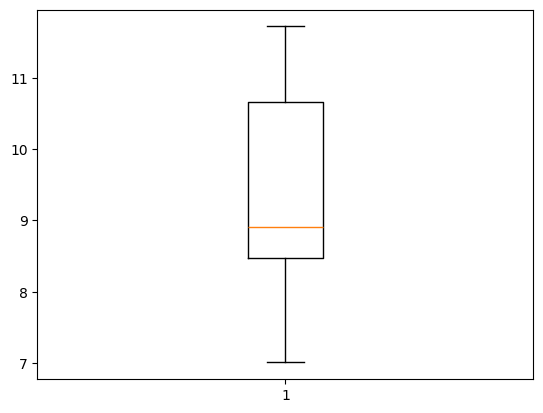

In [70]:
# np.log1p(df['price']).hist()
plt.boxplot(np.log1p(df['price']))

{'whiskers': [<matplotlib.lines.Line2D at 0x7d1843dc89d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d1843dcbb90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d1843dc80d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d1843d75890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d1843cf7250>],
 'means': []}

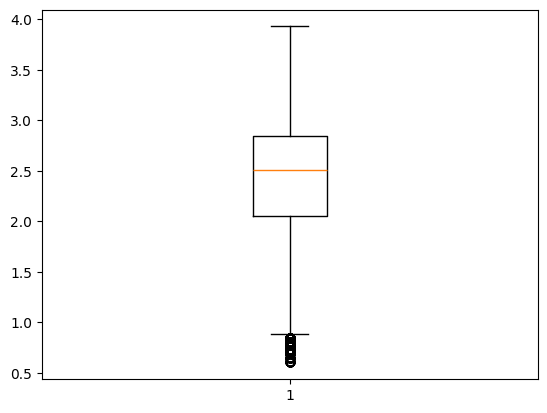

In [71]:
# np.log1p(df['duration']).hist()
plt.boxplot(np.log1p(df['duration']))

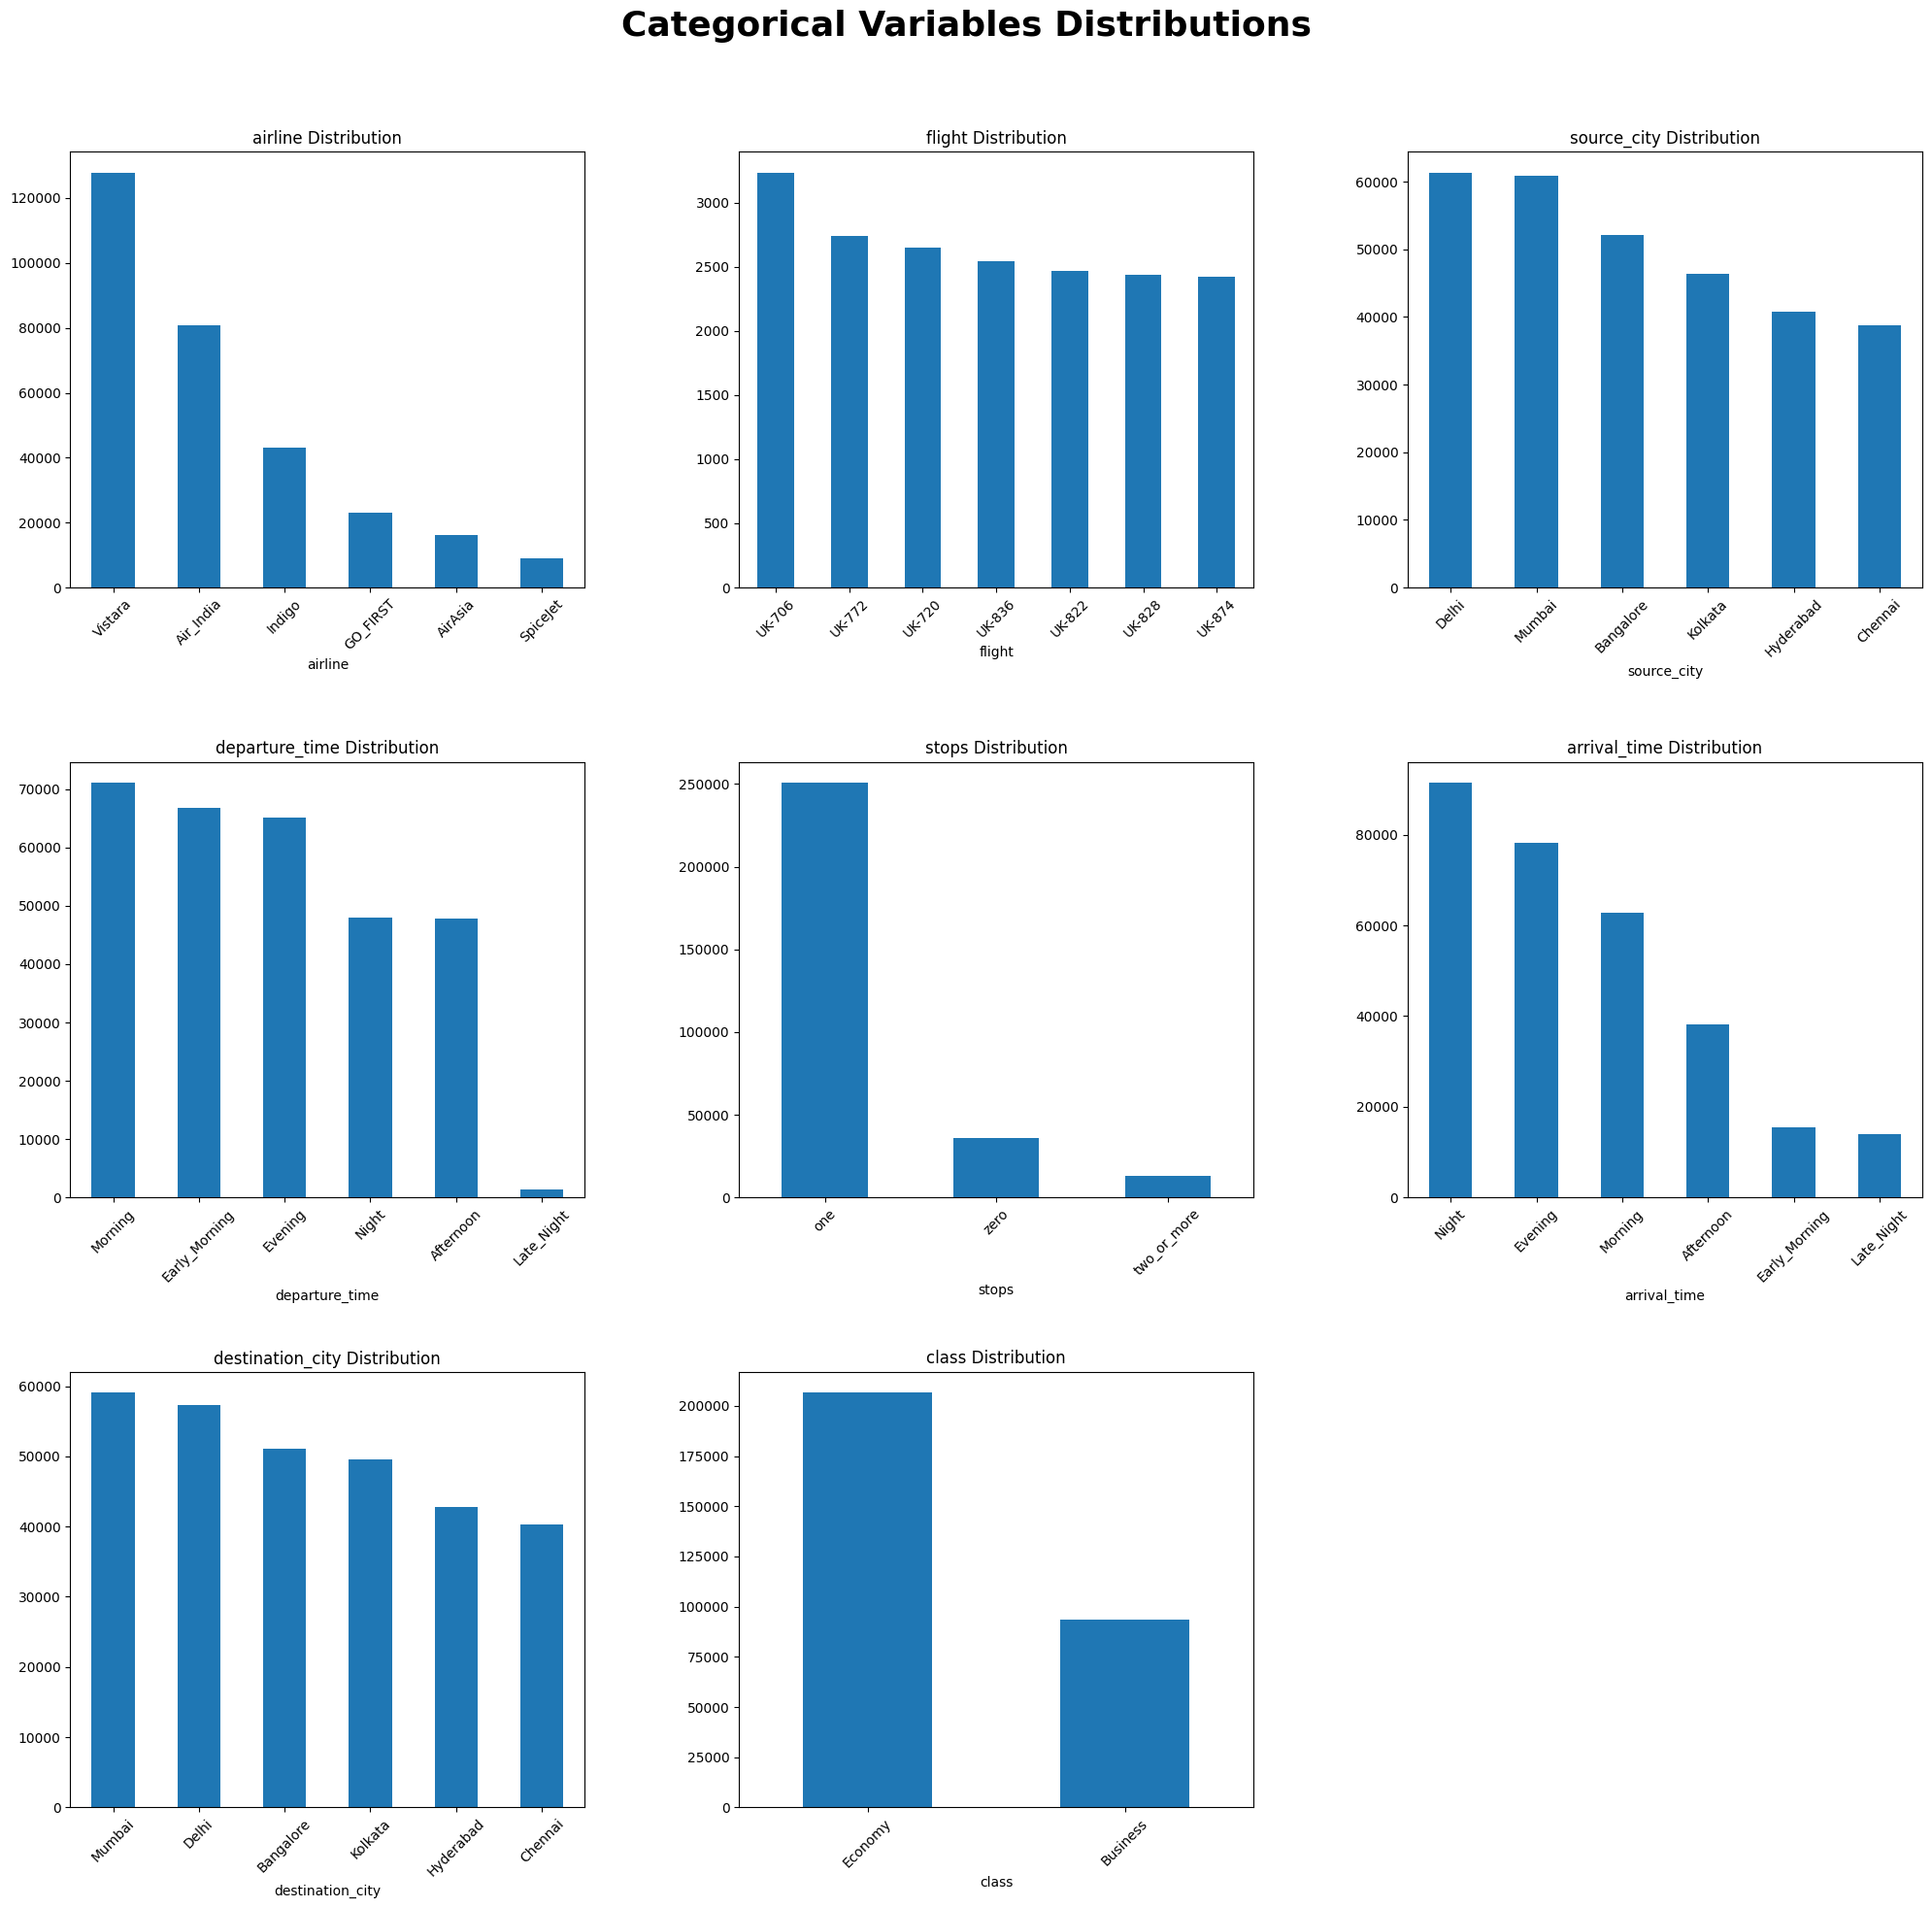

In [72]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(objects):
  plt.subplot(3, 3 , i+1)
  if(df[col].nunique()>7):
      df[col].value_counts().head(7).plot(kind='bar')
  else:
    df[col].value_counts().plot(kind='bar')
  plt.xticks(rotation = 45)
  plt.title(f"{col} Distribution")
plt.suptitle("Categorical Variables Distributions", fontsize=26, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.4, wspace=0.3)

- There doesnt seem to be remarkable insights other than that the top 7 flights are ones that start with UK that may indicate something related to united kingdom more data info needed to be sure
- The Flight data seem to be based in india since all cities are located in india, Delhi the most common source_flight city is india capital
- People prefer travedling in the morning and in consequense they arrive at night
-Prpole prefer economy class which is apparent since its lowedr in cost

# Bivariate Visuals
## Numeric VS Numeric

In [73]:
numeric[0:2]

['duration', 'days_left']

/tmp/ipython-input-810031871.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


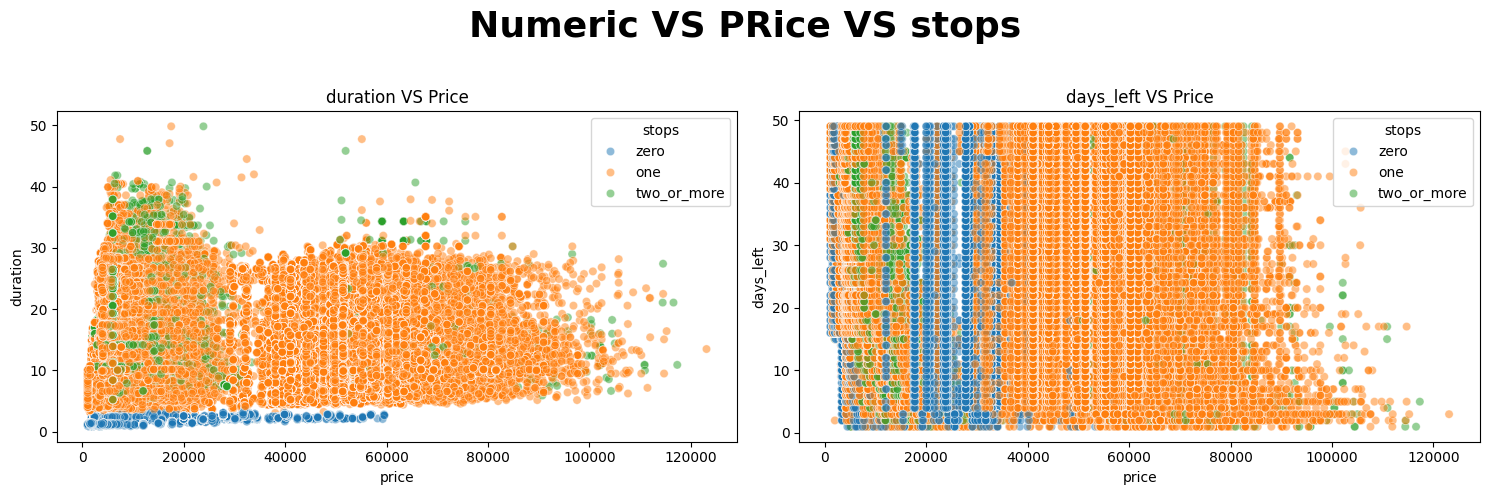

In [74]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric[0:2]):
  plt.subplot(1, 2, i+1)
  sns.scatterplot(data = df, x='price', y= col ,hue='stops', alpha=0.5)
  plt.title(f"{col} VS Price")
plt.suptitle("Numeric VS PRice VS stops", fontsize=26, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])

/tmp/ipython-input-1109020356.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


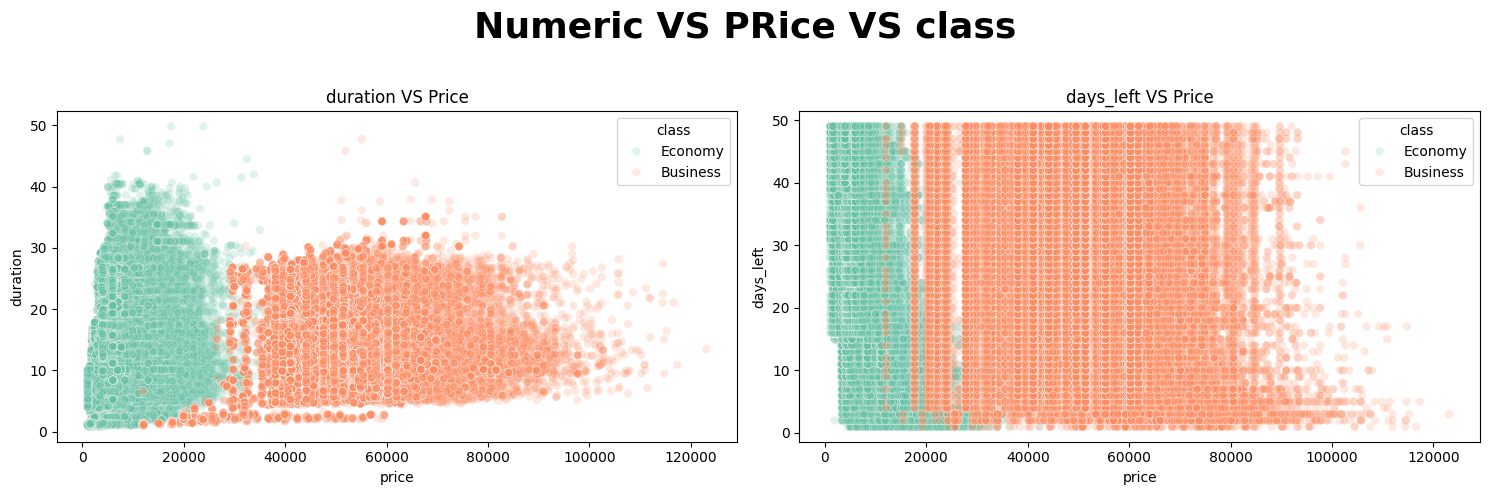

In [75]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric[0:2]):
  plt.subplot(1, 2, i+1)
  sns.scatterplot(data = df, x='price', y= col ,hue='class',palette="Set2", alpha=0.2)
  plt.title(f"{col} VS Price")
plt.suptitle("Numeric VS PRice VS class", fontsize=26, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])

- As suggested above it seems that even though there isnt a strong no linear relation between price and duration
- The stops has a relation with duration which explains the huge duration gaps even though all travels are inside india
- When the stops are one or more the duration is between 5 hours to 50 it seems that travelers may book a flight with the stop being multiple days
- As for the travels with zero stops and small duration the price varies whivh seems to indicate another relation with another variable

- This makes it apparent that the reason fro the zero stop flights to have high prices due to them being in buisness class
- People go in economy class mostly when the flight duration exceeds 30 hours to avoid high prices

- There doesnt seem a relation with booking the flights days prior to the price of the flight nor with the class or stops

Text(0.5, 1.0, 'Correlation Matrix')

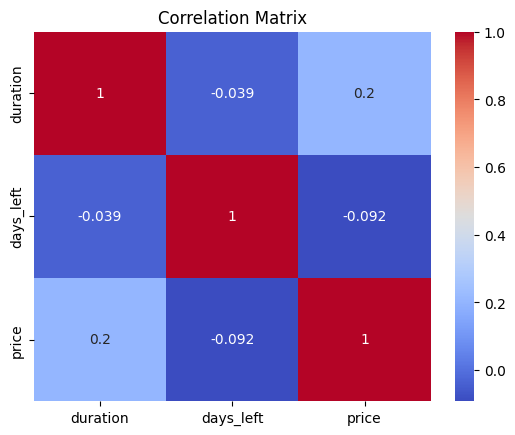

In [76]:
sns.heatmap(df[numeric].corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")

- There arent linear relations with any of the features the strongest is between the price and duration

In [77]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

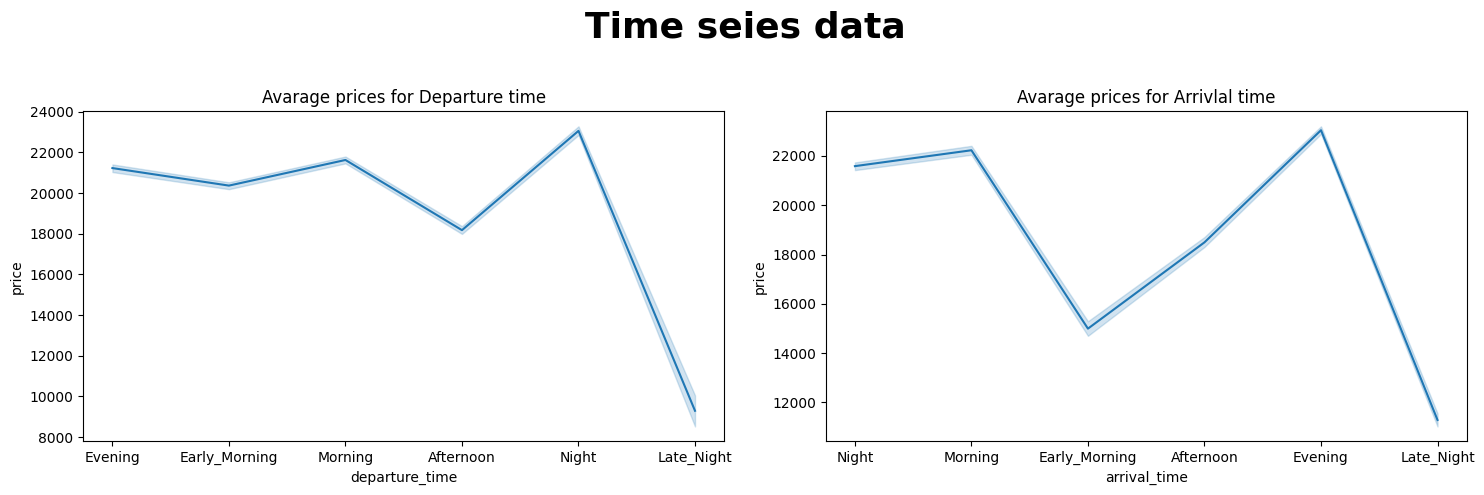

In [93]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data = df, x="departure_time", y="price")
plt.title("Avarage prices for Departure time")
plt.subplot(1, 2, 2)
sns.lineplot(data = df, x="arrival_time", y="price")
plt.title("Avarage prices for Arrivlal time")
plt.suptitle("Time seies data", fontsize=26, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])

- It seems prices drop Late at night as a departure time and the highest price is at night
- AS for arrival early mornings and Late night arrivals are particularly low

Text(0.5, 1.0, 'Airline Avarage prices')

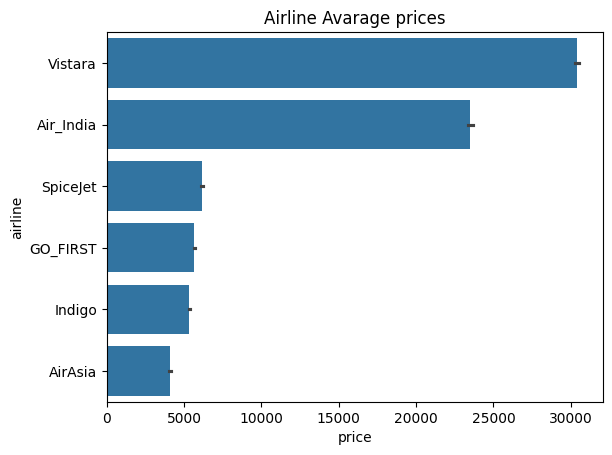

In [86]:
order = df.groupby("airline")["price"].mean().sort_values(ascending=False).index
sns.barplot(data =df, x='price', y='airline', order=order)
plt.title("Airline Avarage prices")

# Pipline

## Numeric Preprocessing

- Since duration and price are highluy skwed i will use log transform and Robust scaler since its sensitive to outliers
- Days left i will use standard scaler sice it doesnt have outliers

In [94]:
from sklearn.preprocessing import RobustScaler, StandardScaler, FunctionTransformer, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [95]:
objects

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [96]:
numeric

['duration', 'days_left', 'price']

In [98]:
num_out = ['duration']
num = ['days_left']
ordinal = ['departure_time','stops', 'arrival_time']
nominal = ['airline','source_city','destination_city','class']

In [99]:
dep_order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']
arr_order = dep_order
stops_order = ['zero', 'one', 'two_or_more']

In [113]:
def log_transform(x):
    return np.log1p(x)

out_trans = Pipeline(steps = [
    ("log", FunctionTransformer(log_transform)),
    ("scaler", RobustScaler())
])

In [114]:
num_trans = Pipeline(steps = [
    ("scaler", StandardScaler())
])

In [115]:
ordinal_trans = OrdinalEncoder(categories=[dep_order, stops_order, arr_order])

In [103]:
nominal_trans =OneHotEncoder(handle_unknown="ignore", sparse_output=False)

In [116]:
preprocessing = ColumnTransformer(
    transformers=[
        ("outliers_transform", out_trans, num_out),
        ("scaler", num_trans, num),
        ("ordinal_transform", ordinal_trans, ordinal),
        ("nominal_transform", nominal_trans, nominal),
    ]
)

In [117]:
model = Pipeline(steps=[
    ("Preprocessing",preprocessing),
    ("model", LinearRegression())
])

In [118]:
X = df.drop(["price", "flight"], axis =1)
# X
y = df['price']
# y

In [119]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [120]:
ytrainlog = np.log1p(ytrain)
ytestlog = np.log1p(ytest)

In [121]:
model.fit(xtrain, ytrainlog)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('outliers_transform',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<function log_transform at 0x7d1839dfbec0>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['duration']),
                                                 ('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['days_left']),
                                                 ('ordinal_transform',
                                                  OrdinalEncoder(categories=[['Early_Morn...
                                                                              'Afternoon',
                                                                              'Evening',
                                                                              'Night',
                                                                              'Late_Night'],
                                                                             ['zero',
                                                                              'one',
                                                                              'two_or_more'],
                                                                             ['Early_Morning',
                                                                              'Morning',
                                                                              'Afternoon',
                                                                              'Evening',
                                                                              'Night',
                                                                              'Late_Night']]),
                                                  ['departure_time', 'stops',
                                                   'arrival_time']),
                                                 ('nominal_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['airline', 'source_city',
                                                   'destination_city',
                                                   'class'])])),
                ('model', LinearRegression())])

In [122]:
train_pred = model.predict(xtrain)
y_pred = model.predict(xtest)

In [123]:
evaluation(ytrainlog, train_pred, ytestlog, y_pred)

Model Evaluation :
Train MSE :0.10542378710886177
Train MAE : 0.2552019588031518
Train R squared : 0.9148377954060767
------------
Test MSE : 0.10396255593981503
Test MAE : 0.2536144483351874
Test R squared : 0.9160605408881762


In [124]:
import joblib
joblib.dump(model, "model.pkl")

['model.pkl']

In [126]:
reg_pipeline = joblib.load("model.pkl")

## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*
